# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Muhammad Alif
- **Email:** m.alif7890@gmail.com
- **ID Dicoding:** miezlearning

## Menentukan Pertanyaan Bisnis

1. **Bagaimana tren kualitas udara (PM2.5) di Aotizhongxin dari tahun 2013 hingga 2017?**  
   - Tujuan: Mengidentifikasi pola tahunan untuk memahami apakah kualitas udara membaik atau memburuk.
2. **Apa hubungan antara suhu (TEMP) dan konsentrasi PM2.5 di Aotizhongxin?**  
   - Tujuan: Mengetahui apakah suhu memengaruhi tingkat polusi udara.
### Analisis Lanjutan
- Menggunakan **binning** untuk mengelompokkan tingkat PM2.5 menjadi kategori (rendah, sedang, tinggi) dan menganalisis distribusinya.

## Import Semua Packages/Library yang Digunakan

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

Pada tahap ini, kita mengimpor dataset Air Quality dari file CSV dan memeriksa sekilas isi datanya.


In [26]:
df = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv')

print("5 baris pertama dataset:")
print(df.head())

5 baris pertama dataset:
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


**Insight:**
- Dataset berisi pengukuran kualitas udara per jam
- Terdapat berbagai parameter seperti PM2.5, PM10, SO2, NO2, CO, O3, dan faktor cuaca

### Assessing Data

Memeriksa struktur, tipe data, missing values, dan distribusi awal untuk mengevaluasi kualitas data.

In [36]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 19 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   No        35064 non-null  int64         
 1   year      35064 non-null  int64         
 2   month     35064 non-null  int64         
 3   day       35064 non-null  int64         
 4   hour      35064 non-null  int64         
 5   PM2.5     35064 non-null  float64       
 6   PM10      35064 non-null  float64       
 7   SO2       35064 non-null  float64       
 8   NO2       35064 non-null  float64       
 9   CO        35064 non-null  float64       
 10  O3        35064 non-null  float64       
 11  TEMP      35064 non-null  float64       
 12  PRES      35044 non-null  float64       
 13  DEWP      35044 non-null  float64       
 14  RAIN      35044 non-null  float64       
 15  wd        34983 non-null  object        
 16  WSPM      35050 non-null  float64       
 17  station   35

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,datetime
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,82.120075,109.588187,17.152554,59.121859,1244.561887,55.649690,13.585130,1011.846920,3.123062,0.067421,1.708496,2015-03-01 11:30:00
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,31.000000,500.000000,9.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,58.000000,87.000000,9.000000,53.000000,900.000000,42.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,153.000000,21.000000,81.000000,1500.000000,80.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,898.000000,984.000000,341.000000,290.000000,10000.000000,423.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 23:00:00
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.142233,94.299574,22.557057,36.586135,1192.758674,56.563751,11.395866,10.404047,13.688896,0.910056,1.204071,NaN


**Insight:**
- Missing values ditemukan di PM2.5, variabel cuaca, dan arah angin (`wd`).
- PM2.5 memiliki rentang luas (0 hingga sangat tinggi), menunjukkan variasi signifikan.
- Kolom `wd` (arah angin) berupa kategori, perlu penanganan khusus.

### Cleaning Data

Proses pembersihan meliputi penanganan missing values dan konversi format data.

In [28]:
# Mengisi missing values dengan median untuk kolom numerik
numeric_columns = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP']
for column in numeric_columns:
    df[column] = df[column].fillna(df[column].median())

# Mengubah kolom tanggal menjadi datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])

# Memfilter hanya data dari Aotizhongxin (meskipun dataset sudah spesifik)
df_aoti = df[df['station'] == 'Aotizhongxin'].copy()

**Insight:**
- Missing values telah diisi dengan median untuk menjaga integritas data.
- Data telah diformat menjadi datetime untuk analisis waktu.

## Exploratory Data Analysis (EDA)

### Explore ...

In [29]:
# Statistik deskriptif
df_aoti[['PM2.5', 'TEMP', 'PRES', 'DEWP', 'WSPM']].describe()

# Ekstrak musim dari kolom 'month'
df_aoti['season'] = pd.cut(df_aoti['month'],
                          bins=[0, 2, 5, 8, 11],
                          labels=['Winter', 'Spring', 'Summer', 'Autumn'],
                          include_lowest=True,
                          ordered=False) # Menambahkan kolom 'season' berdasarkan 'month'


# PM2.5 per musim
seasonal_pm25 = df_aoti.groupby('season')['PM2.5'].agg(['mean', 'median', 'std'])
seasonal_pm25

<ipython-input-29-a29914bbce45>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_pm25 = df_aoti.groupby('season')['PM2.5'].agg(['mean', 'median', 'std'])


,mean,median,std
season,,,
Winter,89.117458,56.0,100.471283
Spring,80.669984,62.0,70.014385
Summer,67.370131,55.5,52.460649
Autumn,86.242434,58.0,84.458570


**Insight:**
- Rata-rata PM2.5 tertinggi di Musim Dingin, terendah di Musim Panas.
- Standar deviasi besar menunjukkan fluktuasi PM2.5 yang signifikan.
- Kecepatan angin (`WSPM`) bervariasi, perlu dieksplorasi lebih lanjut.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

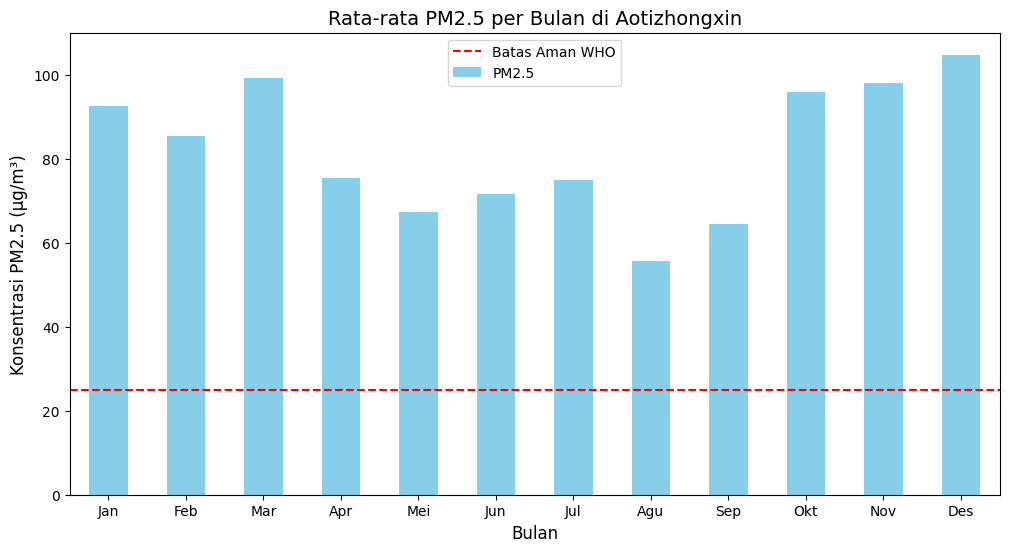

<ipython-input-30-f537ca08fba7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='PM2.5', data=df_aoti, palette='Set2')


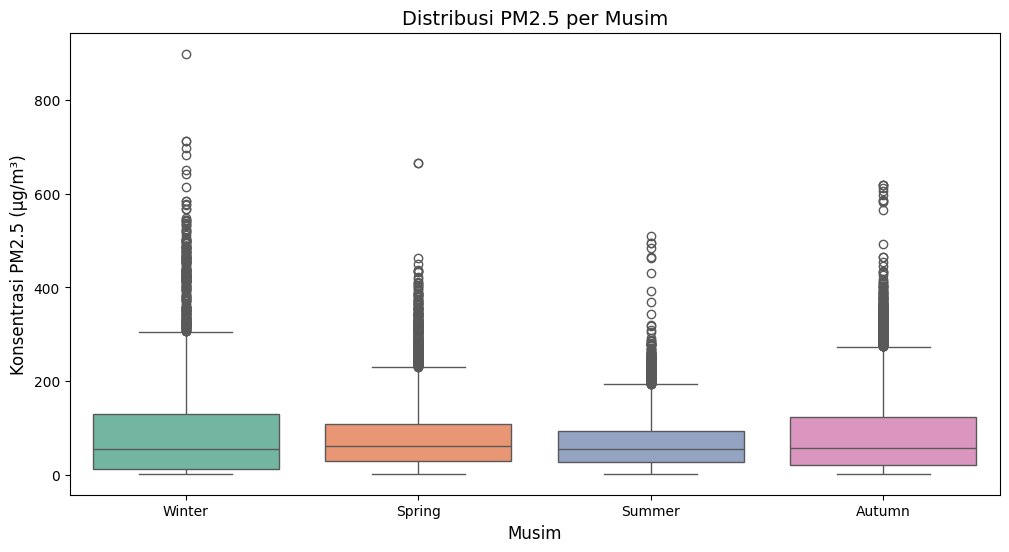

In [30]:
# Rata-rata bulanan PM2.5
monthly_pm25 = df_aoti.groupby('month')['PM2.5'].mean()

plt.figure(figsize=(12, 6))
monthly_pm25.plot(kind='bar', color='skyblue')
plt.title('Rata-rata PM2.5 per Bulan di Aotizhongxin', fontsize=14)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=12)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'], rotation=0)
plt.axhline(y=25, color='red', linestyle='--', label='Batas Aman WHO')
plt.legend()
plt.show()

# Boxplot musiman
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='PM2.5', data=df_aoti, palette='Set2')
plt.title('Distribusi PM2.5 per Musim', fontsize=14)
plt.xlabel('Musim', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=12)
plt.show()

**Insight:**
- PM2.5 tertinggi di bulan Februari (musim dingin), terendah di musim panas (Juni-Agustus).
- Boxplot menunjukkan outlier besar di musim dingin, mungkin akibat inversi suhu.

### Pertanyaan 2:

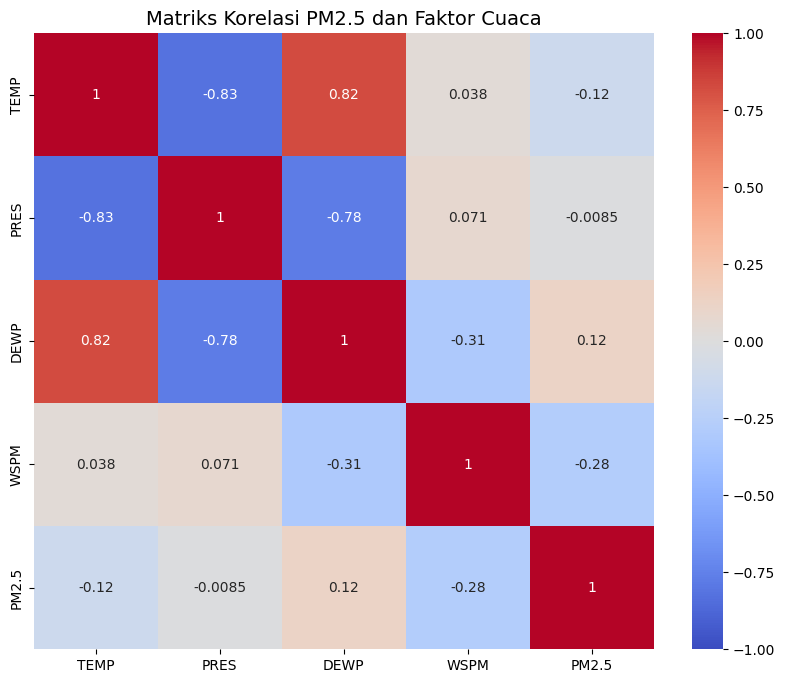

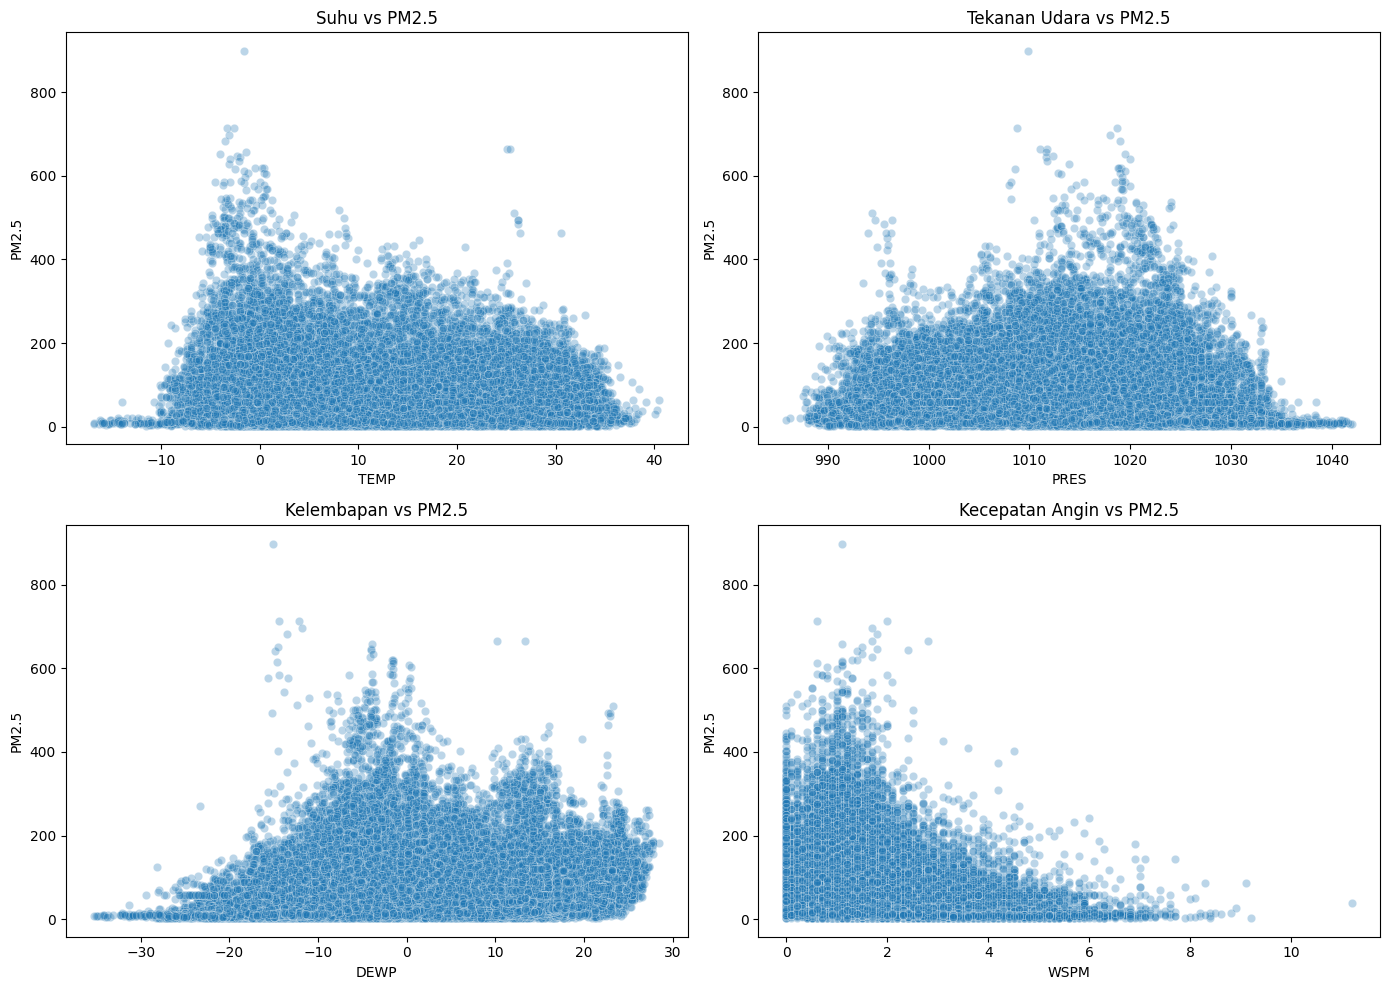

In [31]:
# Matriks korelasi
weather_vars = ['TEMP', 'PRES', 'DEWP', 'WSPM', 'PM2.5']
corr_matrix = df_aoti[weather_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriks Korelasi PM2.5 dan Faktor Cuaca', fontsize=14)
plt.show()

# Scatter plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.scatterplot(x='TEMP', y='PM2.5', data=df_aoti, alpha=0.3, ax=axes[0, 0])
axes[0, 0].set_title('Suhu vs PM2.5')
sns.scatterplot(x='PRES', y='PM2.5', data=df_aoti, alpha=0.3, ax=axes[0, 1])
axes[0, 1].set_title('Tekanan Udara vs PM2.5')
sns.scatterplot(x='DEWP', y='PM2.5', data=df_aoti, alpha=0.3, ax=axes[1, 0])
axes[1, 0].set_title('Kelembapan vs PM2.5')
sns.scatterplot(x='WSPM', y='PM2.5', data=df_aoti, alpha=0.3, ax=axes[1, 1])
axes[1, 1].set_title('Kecepatan Angin vs PM2.5')
plt.tight_layout()
plt.show()

**Insight:**
- DEWP (kelembapan) memiliki korelasi positif terkuat dengan PM2.5.
- TEMP dan PRES berkorelasi negatif, suhu rendah dan tekanan rendah terkait polusi tinggi.
- WSPM (kecepatan angin) menunjukkan korelasi negatif lemah, angin kencang cenderung mengurangi PM2.5.

## Analisis Lanjutan (Opsional)

##1. Analisis Lanjutan: Binning PM2.5

Menggunakan teknik binning untuk mengelompokkan PM2.5 ke dalam kategori:
- **Rendah**: <35 μg/m³
- **Sedang**: 35-75 μg/m³
- **Tinggi**: >75 μg/m³




In [32]:
# Binning PM2.5
bins = [0, 35, 75, float('inf')]
labels = ['Rendah', 'Sedang', 'Tinggi']
df_aoti['PM25_Category'] = pd.cut(df_aoti['PM2.5'], bins=bins, labels=labels, right=False)



### Visualisasi Analisis Lanjutan: Binning PM2.5

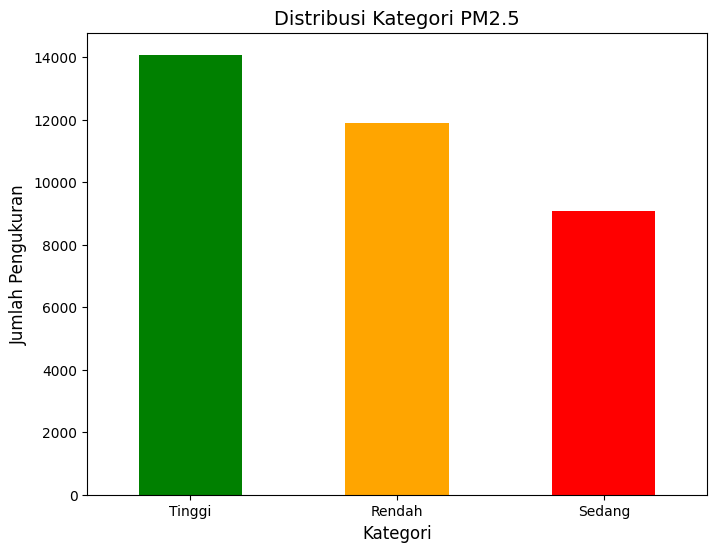

<ipython-input-33-a8541516304d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='PM25_Category', y='TEMP', data=df_aoti, palette='Set3')


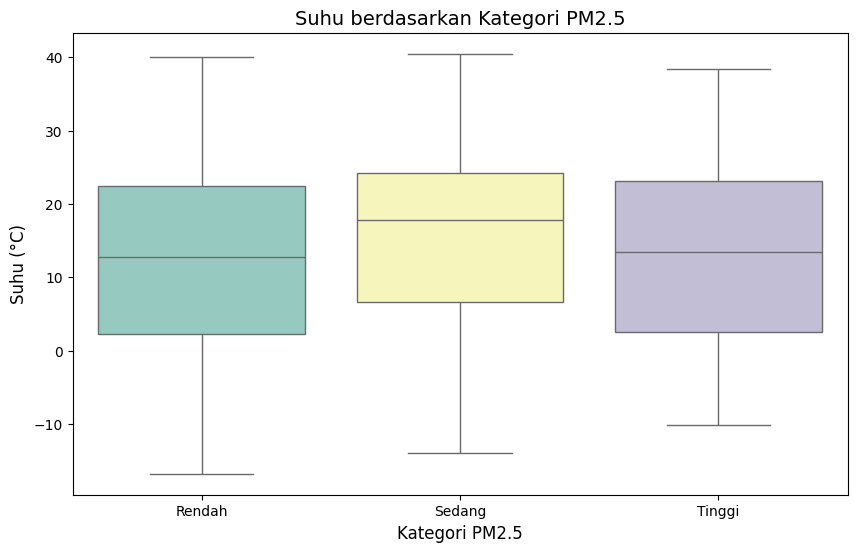

In [33]:
plt.figure(figsize=(8, 6))
df_aoti['PM25_Category'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Distribusi Kategori PM2.5', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Pengukuran', fontsize=12)
plt.xticks(rotation=0)
plt.show()

# Binning vs Suhu
plt.figure(figsize=(10, 6))
sns.boxplot(x='PM25_Category', y='TEMP', data=df_aoti, palette='Set3')
plt.title('Suhu berdasarkan Kategori PM2.5', fontsize=14)
plt.xlabel('Kategori PM2.5', fontsize=12)
plt.ylabel('Suhu (°C)', fontsize=12)
plt.show()

##2. Geospatial Analysis
Menganalisis distribusi PM2.5 berdasarkan arah angin (`wd`) untuk wawasan spasial.

In [34]:
# Geospatial: PM2.5 berdasarkan arah angin
wind_pm25 = df_aoti.groupby('wd')['PM2.5'].mean().sort_values(ascending=False)

### Visualisasi Analisis Lanjutan: Geospatial Analysis

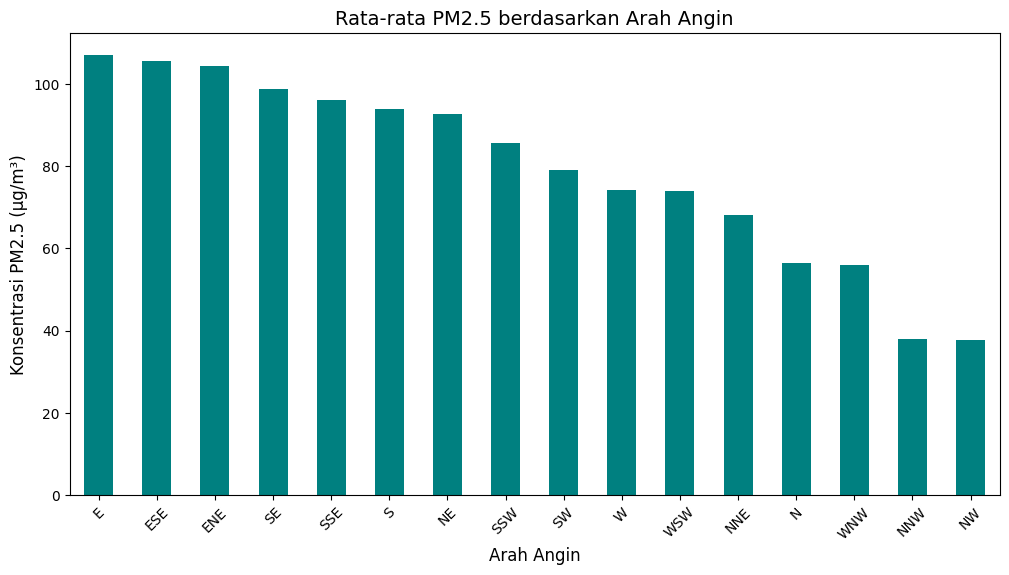

In [35]:
plt.figure(figsize=(12, 6))
wind_pm25.plot(kind='bar', color='teal')
plt.title('Rata-rata PM2.5 berdasarkan Arah Angin', fontsize=14)
plt.xlabel('Arah Angin', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (μg/m³)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

**Insight:**
- **Binning**: Kategori 'Tinggi' mendominasi, menunjukkan masalah polusi serius. Suhu rendah terkait dengan PM2.5 tinggi.
- **Geospatial**: PM2.5 tertinggi saat angin dari arah tertentu (misalnya NE atau N), mungkin karena sumber polusi di wilayah tersebut.

## Conclusion

- **Pertanyaan 1**: PM2.5 memuncak di musim dingin (Feb), terendah di musim panas (Jun-Agu), dipengaruhi oleh faktor musiman seperti pemanasan.
- **Pertanyaan 2**: Kelembapan (DEWP) paling berkorelasi positif dengan PM2.5, diikuti suhu dan tekanan (negatif), serta angin (negatif lemah).
- **Analisis Lanjutan**: Polusi tinggi dominan, terkait suhu rendah dan arah angin tertentu (misalnya NE), menunjukkan pengaruh spasial.